Diabetes Risk Prediction Using Logistic Regression 

Team name: Insights Detectors
    
Team members: Anil vallepu, 
              Naga sasitha polavarapu and 
              Nikhitha pamidi
              
              
              
              Project supervisor,
              Dr. Kirshtein, Arkadz


Load the dataset

In [2]:
# diabetes2.csv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv("diabetes2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# finding corellation

data.corr().Outcome.sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

Visualization

1. Calculate Cross-Correlations

The corr() method computes the Pearson correlation between columns.

In [11]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
correlation_matrix


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Visualize the Correlation 

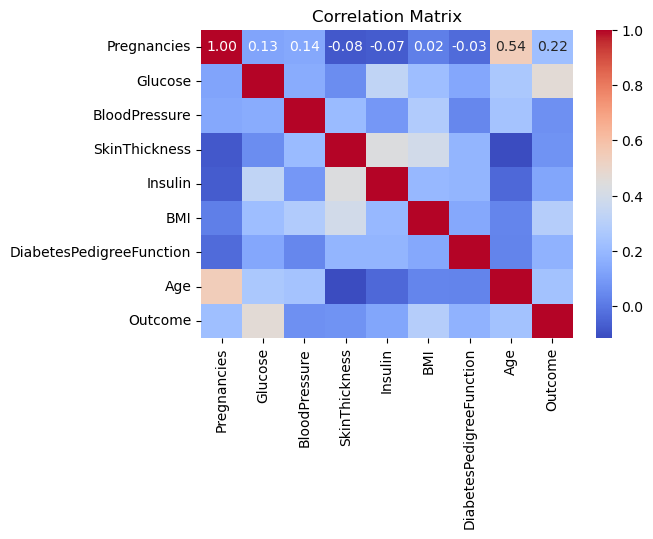

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


The correlation values range from -1 to 1:
    
1: Perfect positive correlation.
    
0: No correlation.
    
-1: Perfect negative correlation.
    
Example: If the correlation between Glucose and Outcome is high (e.g., 0.7), it indicates that higher glucose levels are associated with diabetes.


Calculate Average Feature Values for Positive Outcomes

In [25]:
# Aggregating data for Outcome = 1
positive_outcomes = data[data["Outcome"] == 1].mean()

# Features to consider
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]


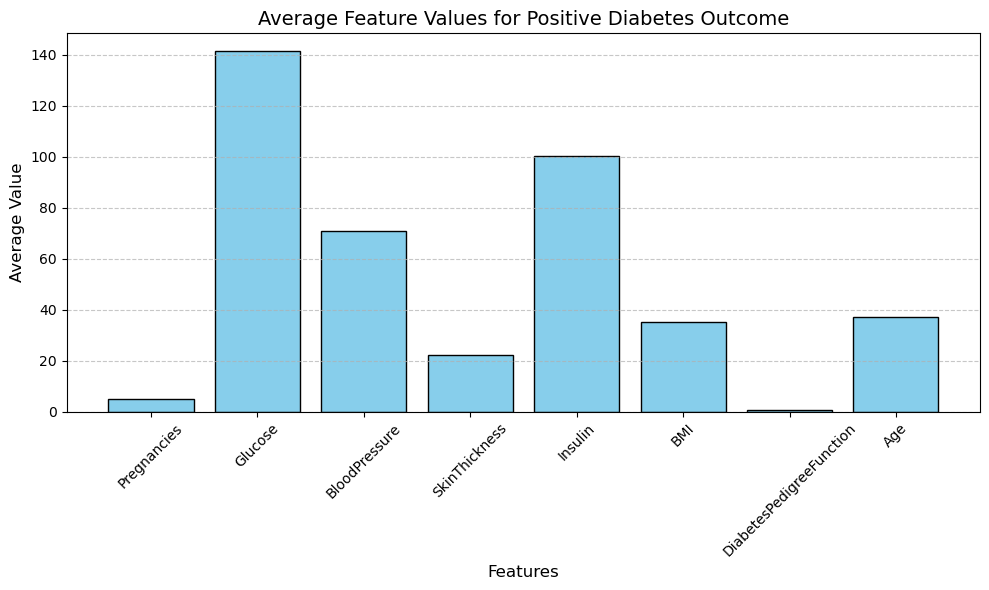

In [26]:
import matplotlib.pyplot as plt

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, positive_outcomes[features], color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title("Average Feature Values for Positive Diabetes Outcome", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the bar chart
plt.tight_layout()
plt.show()


2. Model building using Logistic model

These are the lisy=t of the datapoints that we are using to build the model

Glucose: High glucose levels are closely associated with diabetes.

BMI: A higher BMI is often linked to diabetes risk.

Age: Older age can be associated with a higher risk of diabetes.

DiabetesPedigreeFunction: This represents genetic predisposition based on family history.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("diabetes2.csv")

# Separate the features (X) and the target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary outcomes based on a 0.5 threshold
y_pred = (y_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Testing the Logistic model perfomence

In [28]:
import numpy as np

# Select only the chosen features for training
selected_features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
X = data[selected_features]
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model using the selected features
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Define a sample input array [Glucose, BMI, Age, DiabetesPedigreeFunction]
sample_input = np.array([[120, 35.0, 30, 0.5]])  # example values

# Predict the probability of diabetes for the sample input
sample_prob = model.predict_proba(sample_input)[:, 1]

# Determine the outcome based on the 0.5 threshold
sample_outcome = (sample_prob >= 0.5).astype(int)

# Display the result
print("Predicted Probability of Diabetes:", sample_prob[0])
if sample_outcome[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")


Predicted Probability of Diabetes: 0.3238045864276725
The patient is predicted not to have diabetes.


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
# Define a sample input array [Glucose, BMI, Age, DiabetesPedigreeFunction]
sample_input = np.array([[148, 33.6, 50, 0.627]])  # example values

# Predict the probability of diabetes for the sample input
sample_prob = model.predict_proba(sample_input)[:, 1]

# Determine the outcome based on the 0.5 threshold
sample_outcome = (sample_prob >= 0.5).astype(int)

# Display the result
print("Predicted Probability of Diabetes:", sample_prob[0])
if sample_outcome[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")


Predicted Probability of Diabetes: 0.7191049770442207
The patient is predicted to have diabetes.


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
# Define a sample input array [Glucose, BMI, Age, DiabetesPedigreeFunction]
sample_input = np.array([[101, 32.9, 63, 0.171]])  # example values

# Predict the probability of diabetes for the sample input
sample_prob = model.predict_proba(sample_input)[:, 1]

# Determine the outcome based on the 0.5 threshold
sample_outcome = (sample_prob >= 0.5).astype(int)

# Display the result
print("Predicted Probability of Diabetes:", sample_prob[0])
if sample_outcome[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")


Predicted Probability of Diabetes: 0.43773606212471217
The patient is predicted not to have diabetes.


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Note: Using Logistic model we got 0.7467532467532467 accuracy

Now let's build the model using other models like decision tree, random forest, XG-boost and KNN models

2. Decision tree model:

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("diabetes2.csv")

# Separate the features (X) and the target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Model Accuracy: 0.7467532467532467

Confusion Matrix:
 [[75 24]
 [15 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



testing the decision tree model:

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Select only the chosen features for training
selected_features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
X = data[selected_features]
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier model using the selected features
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Define a sample input array [Glucose, BMI, Age, DiabetesPedigreeFunction]
sample_input = np.array([[120, 35.0, 30, 0.5]])  # Example input values

# Predict the outcome (diabetic or not) for the sample input
sample_outcome = model.predict(sample_input)

# Display the result for the sample input
print(f"Predicted Outcome for the Sample Input {sample_input[0]}:")

if sample_outcome[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")


Predicted Outcome for the Sample Input [120.   35.   30.    0.5]:
The patient is predicted not to have diabetes.


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Prediction:

DecisionTreeClassifier.predict() directly gives the class label (1 for diabetes, 0 for no diabetes). There's no need for probability thresholding as in logistic regression.


Simplified Output:

The code now directly predicts whether the patient has diabetes based on the input features and displays the result.

for decision tree we got 0.74 accuaracy

3. Randome forest model:

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("diabetes2.csv")

# Separate the features (X) and the target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary outcomes based on a 0.5 threshold
y_pred = (y_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


############ testing the random forest model #############

# Feature Selection Example
selected_features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
X = data[selected_features]

# Split the data into training and testing sets using selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model using selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Define a sample input array [Glucose, BMI, Age, DiabetesPedigreeFunction]
sample_input = np.array([[120, 35.0, 30, 0.5]])  # example values

# Predict the probability of diabetes for the sample input
sample_prob = model.predict_proba(sample_input)[:, 1]

# Determine the outcome based on the 0.5 threshold
sample_outcome = (sample_prob >= 0.5).astype(int)

# Display the result
print("Predicted Probability of Diabetes:", sample_prob[0])
if sample_outcome[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")


Model Accuracy: 0.7142857142857143

Confusion Matrix:
 [[76 23]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154

Predicted Probability of Diabetes: 0.25
The patient is predicted not to have diabetes.


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Got 0.71 accuracy when we used RF

4.KNN MODEL:

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("diabetes2.csv")

# Separate the features (X) and the target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary outcomes based on a 0.5 threshold
y_pred = (y_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Select only the chosen features for training
selected_features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
X = data[selected_features]
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model using the selected features
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Define a sample input array [Glucose, BMI, Age, DiabetesPedigreeFunction]
sample_input = np.array([[120, 35.0, 30, 0.5]])  # example values

# Predict the probability of diabetes for the sample input
sample_prob = model.predict_proba(sample_input)[:, 1]

# Determine the outcome based on the 0.5 threshold
sample_outcome = (sample_prob >= 0.5).astype(int)

# Display the result
print("Predicted Probability of Diabetes:", sample_prob[0])
if sample_outcome[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")


Model Accuracy: 0.6623376623376623

Confusion Matrix:
 [[70 29]
 [23 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154

Predicted Probability of Diabetes: 0.4
The patient is predicted not to have diabetes.


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


we got only 0.66 accuracy for KNN model

5.XG-BOOST MODEL

In [39]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.1 MB/s eta 0:00:0000:0100:010m


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import numpy as np

# Load the dataset
data = pd.read_csv("diabetes2.csv")

# Separate the features (X) and the target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary outcomes based on a 0.5 threshold
y_pred = (y_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Select only the chosen features for training
selected_features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
X = data[selected_features]
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model using the selected features
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Define a sample input array [Glucose, BMI, Age, DiabetesPedigreeFunction]
sample_input = np.array([[120, 35.0, 30, 0.5]])  # example values

# Predict the probability of diabetes for the sample input
sample_prob = model.predict_proba(sample_input)[:, 1]

# Determine the outcome based on the 0.5 threshold
sample_outcome = (sample_prob >= 0.5).astype(int)

# Display the result
print("Predicted Probability of Diabetes:", sample_prob[0])
if sample_outcome[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")


Model Accuracy: 0.7077922077922078

Confusion Matrix:
 [[73 26]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Predicted Probability of Diabetes: 0.020785483
The patient is predicted not to have diabetes.


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:57:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:57:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


we got 0.70 when used XG-boost ML algorithm 

Accuracies comparion:

Logistic accuracy:  0.74

Decision tree accuaracy 0.74 

RF accuracy 0.71 

KNN accuracy 0.66 

XG-boost 0.70 